<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=center>
<font face="IranNastaliq" size=30>
<p></p>
به نام خدا
</font>
<br>
<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
</font>
<br>
<font color=blue>
داده‌ساختارها و الگوریتم‌ها
</font>
<br>
ترم دوم سال تحصیلی ۱۳۹۸-۱۳۹۷
</div>
<hr/>
<font color=red size=6>
<p></p>

<div align=center>فصل پنجم، بخش دوم: درخت دودویی جست‌وجو</div>
</font>
<div align=center>
آرش پوردامغانی، یاشار دبیران، فاطمه علی‌پور و علی شریفی</div>
<hr>
</font></div>
<div>
<h3> فهرست محتویات</h3>
<ul style="margin-right: 0;">
<div>
<h3> فهرست محتویات</h3>
<ul style="margin-right: 0;">
<li><a href="#intro">مقدمه</a></li>
<li><a href="#search">جستجو</a></li>
<li><a href="#insert">درج</a></li>
<li><a href="#delete">حذف</a></li>
<li><a href="#height">میانگین ارتفاع درخت جست‌وجو</a></li>
<li><a href="#lca">پایین‌ترین جد مشترک</a></li>
</ul>
</div>
</ul>
</div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font id="intro" size=5><h1>
مقدمه
</h1>
<p></p>
</font>
<font color=#595959 size=5>
درخت دودویی جست‌وجو ( به انگلیسی: Binary Search Tree یا به اختصار د.د.ج) درختی ریشه‌دار و دودویی است که به ازای هر راس مانند v، مقادیر تمامی راس های زیر درخت بچه‌ی سمت چپ آن از مقدار راس v کوچک‌تر و مقادیر تمامی راس‌های زیردرخت بچه‌ی سمت راستش از v بزرگ‌تر است.  
<br>
<img src="src/images/2.jpg" style="float:center; width:40%">
<br>
<p></p>
هر راس درون د.د.ج  دارای یک برچسب، اشاره‌گر به بچه چپ، اشاره‌گر به بچه راست و اشاره‌گر به پدرش است.
<br>
به غیر از راس ریشه، بقیه راس‌ها حتما پدر خواهند داشت.
</font>

In [2]:
class Node:
    def __init__(self, label, parent):
        self.label = label
        self.parent = parent
        self.leftChild = None
        self.rightChild = None
        
    def __str__(self): # Returns the path from root to node
        if self.parent:
            return str(self.parent) + " " + str(self.label)
        else:
            return str(self.label)

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
برای کار با این ساختمان داده، ۳ عمل متصور هستیم:
<ul>
    <li> جستجو </li>
    <li> درج </li>
    <li> حذف </li>
</ul>
(می‌توانید در <a href="https://visualgo.net/bst">این ‌جا</a> عملیات‌های گفته شده را به صورت تعاملی مشاهده کنید.)
<p></p>
<br>
<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#ff6600 size=6>
<div id="search"><h1>
جستجو
</h1></div>
</font>
<p></p>
    <div style="direction:rtl">
    برای جست‌وجو یک عنصر در د.د.ج، با شروع از ریشه، به ازای هر راسی که درون آن هستیم، مقداری که می‌خواهیم پیدا کنیم را با مقدار راس فعلی مقایسه می‌کنیم. در صورت مساوی بودن، عنصر مورد نظر را پیدا کرده‌ایم اما در غیر این صورت بسته به بزرگ‌تر یا کوچک‌تر بودن مقدار عنصر مورد نظر ما از برچسب راسی که داخلش هستیم، جست‌وجو را در زیردرخت سمت راست یا چپ این راس ادامه می‌دهیم.
    </div>
<br>
<img src="src/images/find-animation.gif" style="float:center; width:50%">

In [3]:
def search(node, label):
    if node is None or node.label == label:
        return node
    elif node.label > label:
        return search(node.leftChild, label)
    else:
        return search(node.rightChild, label)

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
در صورتی که جست‌وجو موفقیت آمیز باشد، تابع به ما راس با مقدار مورد نظر را برمی‌گرداند اما در صورتی که جست‌وجو موفقیت آمیز نباشد، None برگردانده می‌شود.
<p></p>
<br>
اگر از ریشه شروع کنیم و به سمت بچه‌ی چپ هر راس حرکت کنیم تا به راسی مانند v برسیم که بچه‌ی چپ نداشته باشد، راس v مقدار <b>کمینه</b> را در بین راس‌های د.د.ج خواهد داشت.
<br>
به طور مشابه اگر به جای حرکت به سمت بچه‌ی چپ، به سمت بچه‌ی راست حرکت کنیم راس <b>بیشینه</b> را خواهیم‌داشت.

In [4]:
def findMin(node):
    if node.leftChild is None:
        return node
    else:
        return findMin(node.leftChild)
    

def findMax(node):
    if node.rightChild is None:
        return node
    else:
        return findMax(node.rightChild)

<p></p>
<br>
<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#ff6600 size=6>
<div id="insert"><h1>
درج
</h1></div>
</font>
<p></p>

<hr>
برای درج یک عنصر، رویه بازگشتی زیر را در نظر می‌گیریم:
<br>
با شروع از ریشه، راس v که در حال حاضر در آن هستیم را در نظر می‌گیریم. مقداری که می‌خواهیم درج کنیم را با برچسب راس v مقایسه می‌کنیم. اگر از برچسب راس v کوچک‌تر بود، پس جایش در زیردرخت سمت چپ v است و اگر مقدارش از برچسب راس v بزرگ‌تر بود، جایش در زیردرخت سمت راست v است. بسته به این مقایسه، به یکی از بچه‌های چپ و راست v می‌رویم و کار را ادامه می‌دهیم. این کار وقتی پایان می‌یابد که v مساوی None شود. به طور مثال فرض کنید باید به زیردرخت بچه سمت راست v برویم ولی v بچه‌ی سمت راست ندارد، در این صورت یک راس با مقدار مورد نظرمان ایجاد می‌کنیم و آن را بچه‌ی سمت راست v قرار می‌دهیم.
<br>
<img src="src/images/insertion-animation.gif" style="float:center; width:50%">

In [5]:
def insert(node, value):
    if (value < node.label):
        if (node.leftChild != None):
            insert(node.leftChild, value)
        else:
            node.leftChild = Node(value, node)
    else:
        if (node.rightChild != None):
            insert(node.rightChild, value)
        else:
            node.rightChild = Node(value, node)

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<p></p>
نکته: اگر د.د.ج را به صورت میان‌ترتیب پیمایش کنیم، اعداد را به صورت مرتب شده بدست می‌آوریم. چرا؟

In [6]:
def inOrderPrint(node):
    if node is None:
        return
    inOrderPrint(node.leftChild)
    print(node.label)
    inOrderPrint(node.rightChild)
root = Node(5, None)
insert(root, 9)
insert(root, 10)
insert(root, 3)
insert(root, 8)
insert(root, 7)
insert(root, 2)
insert(root, 1)
insert(root, 4)
insert(root, 6)
print("InOrder print of the tree:")
inOrderPrint(root)
print ("Searching value 8 in tree:", str(search(root, 8)))
print ("Path to the min node in tree:", findMin(root))
print ("Path to the max node in tree:", findMax(root))

InOrder print of the tree:
1
2
3
4
5
6
7
8
9
10
('Searching value 8 in tree:', '5 9 8')
('Path to the min node in tree:', <__main__.Node instance at 0x10bc78b48>)
('Path to the max node in tree:', <__main__.Node instance at 0x10bc78488>)


<p></p>
<br>
<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#ff6600 size=6>
<div id="delete">
حذف
</div>
</font>
<p></p>

برای حذف یک مقدار از درخت، ابتدا راس v دارای این مقدار را پیدا می‌کنیم. در این مرحله ۳ حالت پیش می‌آید:
<ul>
    <li> راس v بچه نداشته باشد: آن را حذف می‌کنیم. </li>
    <li> راس v یک بچه داشته باشد: v را حذف می‌کنیم و بچه‌اش را جایش قرار می‌دهیم. </li>
    <li> راس v دو بچه داشته باشد: در این صورت راس مینیمم در زیر درخت سمت راست v یا راس ماکزیمم در زیردرخت سمت چپ v را، به نام u را پیدا می‌کنیم. دقت کنید هرکدام از این راس‌ها را که به جای v قرار دهیم و v را حذف کنیم، هنوز شرط لازم برای د.د.ج بودن درخت برقرار است. برچسب راس u را در v قرار می‌دهیم و u را حذف می‌کنیم. از آنجا که u راس مینیمم یا ماکزیمم یک زیردرخت است، حداکثر یک بچه خواهد داشت و می‌شود طبق ۲ حالت اول این راس را حذف کرد. </li>
</ul>
<br></font>
<img src="src/images/delete.png" style="float:center;">

In [7]:
def replaceNodeInParent(oldNode, newNode):
    if root == oldNode:
        root = newNode
    if oldNode.parent: #oldNode is not root
        if oldNode == oldNode.parent.leftChild:
            oldNode.parent.leftChild = newNode
        else:
            oldNode.parent.rightChild = newNode
    
    if newNode:
        newNode.parent = oldNode.parent
        
        
def delete(node, value):
    if node is None:
        return
    
    if node.label < value:
        delete(node.rightChild, value)
    elif node.label > value:
        delete(node.leftChild, value)
    else: # node to be deleted is found
        if node.leftChild and node.rightChild: #has 2 children
            newNode = findMin(node.rightChild)
            node.label = newNode.label
            delete(newNode, newNode.label) #delete the new node
        elif node.leftChild:
            replaceNodeInParent(node, node.leftChild)
        else:
            replaceNodeInParent(node, node.rightChild)
            # This works when node.rightChild is also None

In [7]:
root = Node(2, None)
insert(root, 1)
insert(root, 3)
inOrderPrint(root)
delete(root, 2)
inOrderPrint(root)

1
2
3
1
3


<p></p>
<br>
<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#FF7500 size=6>
<div id="height"><h1>
میانگین ارتفاع درخت جست‌وجو
</h1></div>
</font>
<p></p>

<hr>
در این جا به دادن شهود کلی بسنده می‌کنیم. (اثبات ریاضی دقیق آن را می‌توانید در کتاب دکتر قدسی مشاهده فرمایید.)
<br>
بدین منظور، تمامی جایگشت هایی ممکن را که می‌خواهیم در د.د.ج درج کنیم را در نظر می‌گیرم. توجه کنید عملیات درج هر جایگشتی هنگامی که به ترتیب و از ابتدای آن صورت بگیرد به دقیقا یک د.د.ج یکتا می‌انجامد، به عنوان مثال شکل زیر تمامی د.د.ج‌های حاصل از درج اعداد ۱ تا ۴ را نشان می‌دهد: 
<img src="src/images/A03.jpg" style="float:center; width:50%">
همان طور که مشاهده می‌کنید، هر چه قدر د.د.ج متعادل‌تر باشد، تعداد بیشتری جایگشت با آن متناظر خواهند بود، این نکته کلیدی را به صورت زیر در حالت کلی بیان می‌کنیم:
<br>
تعداد جایگشت‌های متناظر با د.د.ج t را با p<sub>t</sub> نشان می‌دهیم، و همچنین زیر درخت سمت راست آن را با t<sub>r</sub> و زیردرخت سمت چپ آن را با t<sub>l</sub> نشان می‌دهیم، به شکل زیر توجه کنید:
<img src="src/images/A1.jpg" style="float:center; width:70%">
تعداد جایگشت‌هایی که با این در خت متناظر می‌شوند را می‌توان از فرمول زیر به دست آورد:
<img src="src/images/A23.jpg" style="float:center; width:40%">
حال در این فرمول،می‌توان نشان داد که هنگامی که |t<sub>l</sub>| و |t<sub>r</sub>| به هم نزدیک باشند، یعنی د.د.ج متعادل باشد، جزء انتخاب آن بسیار بسیار بزرگ تر از حالتی خواهد بود که این دو از هم فاصله داشته باشند. بنابراین هر چه درخت متعادل‌تر باشد، تعداد جایشگت بیشتری با آن متناظر خواهد شد.
<br>
پس به صورت شهودی در حالت میانگین، با یک درخت متعادل، که  مرتبه پیچیدگی ارتفاع آن از lgnاست مواجه خواهیم شد
<br>
در نمودار زیر هم که حاصل محاسبه میانیگن ارتفاع درخت برای حالت های مختلف است می‌توانید ببینید که این مقدار عددی بین ۳*lgn و ۲*lgn است!

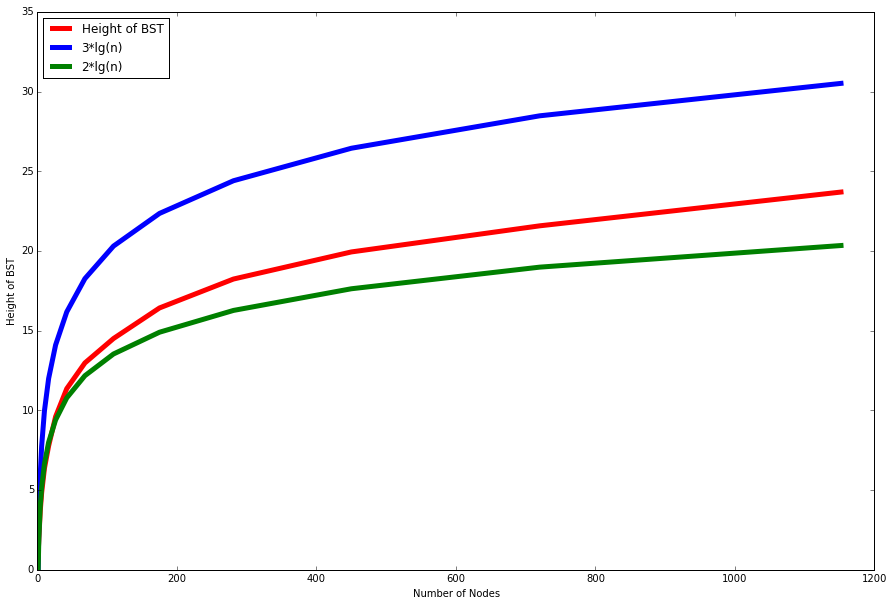

In [8]:
%matplotlib inline
from matplotlib.pyplot import *
import random

def find_Height(node, height):
    if(node  == None):
        return height
    return max(find_Height(node.leftChild,height+1.0),find_Height(node.rightChild,height+1.0))
    

def get_avg_height(a):
    max_Sample_Size = 160
    avg = 0.0;
    for i in range(max_Sample_Size):
        numbers = [[random.randrange(16000) for k in range(j)] for j in range(a)]
        root = Node(numbers[0],None)
        for j in range(1,len(numbers)):
            insert(root,numbers[j])
        avg = avg + find_Height(root,0.0)
    return avg/float(max_Sample_Size)

import math 

def plot2(N):
    figure(figsize=(15, 10))
    xlabel("Number of Nodes")
    ylabel("Height of BST")
    y = [get_avg_height(a) for a in N]
    plot(N, y, 'r', label='Height of BST',linewidth=5)
    y = [3*math.log(a,2) for a in N]
    plot(N, y, 'b', label='3*lg(n)',linewidth=5)
    y = [2*math.log(a,2) for a in N]
    plot(N, y, 'g', label='2*lg(n)',linewidth=5)
    legend(loc=2)
N = np.power(1.6,range(1,16)).astype(int)
plot2(N)

<p></p>
<br>
<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#ff6600 size=6>
<p></p>
<div id="lca"><h1>
پایین‌ترین جد مشترک
</h1></div>
</font>
<p></p>
در یک درخت ریشه‌دار پایین ترین جد مشترک
(LCA)
دو گره را دور‌ترین راس از ریشه تعریف می‌کنیم که جد هر دو گره باشد.
<img src="src/images/lca.png" style="float:center; width:70%">
<br>
در اینجا به بررسی الگوریتم حل این مسئله برای یک د.د.ج می‌پردازیم.
<hr>
همان‌طور که می‌دانیم تمامی گره‌ها در د.د.ج منحصر به فرد هستند.
گره‌های سمت راست ریشه از آن بزرگ‌تر و گره‌های سمت چپ آن از آن کوچک‌تر هستند و این موضوع به حالت بازگشتی برای همه گره‌ها برقرار است.
<br>
الگوریتم حل:
<br>
از ریشه شروع کرده و مقدار آن را با دو عدد داده شده مقایسه می‌کنیم.
اگر از هردو آن ها کوچکتر بود به سراغ بچه سمت راست آن می‌رویم و اگر از هردوی آن‌ها بزرگتر بود به سراغ بچه سمت چپ آن می‌رویم.
این الگوریتم بازگشتی را آنقدر ادامه می‌دهیم تا به گره‌ای برسیم که مقدار آن بین دو عدد داده شده مسئله باشد.








In [9]:
def lca(root, x, y):
    if root.label > x and root.label > y:
        lca(root.leftChild, x, y)
    elif root.label < x and root.label < y:
        lca(root.rightChild, x, y)
    else:
        print(root.label)

In [10]:
root = None
root = Node(10, None)
insert(root, -10)
insert(root, 30)
insert(root, 60)
insert(root, 25)
insert(root, 72)
insert(root, 29)
insert(root, 8)
insert(root, 6)
insert(root, 9)
lca(root, 29, 72)

30
